# LaTeX Dataset Bounding Box Visualization

This notebook visualizes bounding boxes from the standardized LaTeX dataset to verify that the pixel coordinates are correctly aligned with the LaTeX equations in the images.

In [1]:
import tarfile
import json
import io
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
# List first 10 images in the tar file
TAR_PATH = "train-00001.tar"

with tarfile.open(TAR_PATH, "r") as tar:
    members = tar.getmembers()
    png_files = [m for m in members if m.name.endswith('.png')]
    
    print("First 10 images:")
    for i in range(min(10, len(png_files))):
        print(f"{i}: {png_files[i].name}")

First 10 images:
0: 0525_0324_smallrot.png
1: 0525_0088.png
2: 0525_0159_rot270.png
3: 0525_0982_rot180.png
4: 0525_0057_rot90.png
5: 0525_0701_rot90.png
6: 0525_0791.png
7: 0525_0726_rot180.png
8: 0525_0766.png
9: 0525_0655.png


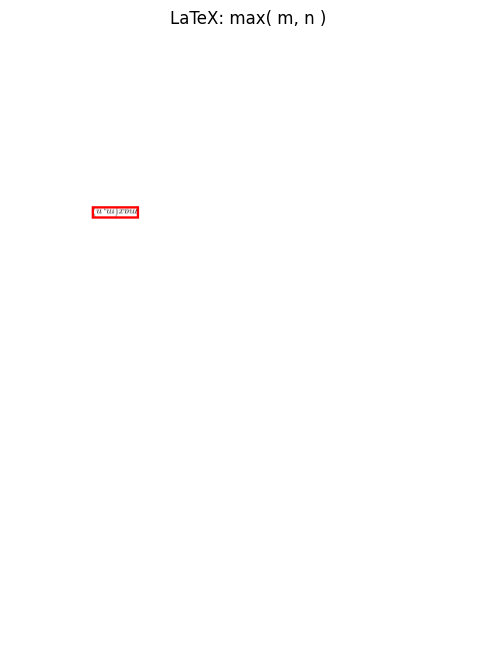

In [11]:
# Choose which image to display (change the number)
IMAGE_INDEX = 3  # Change this to 0, 1, 2, 3, etc.

with tarfile.open(TAR_PATH, "r") as tar:
    members = tar.getmembers()
    png_files = [m for m in members if m.name.endswith('.png')]
    
    # Get the chosen image
    png_member = png_files[IMAGE_INDEX]
    json_name = png_member.name.replace('.png', '.json')
    json_member = next((m for m in members if m.name == json_name), None)
    
    # Load and display
    png_data = tar.extractfile(png_member).read()
    img = Image.open(io.BytesIO(png_data))
    
    json_data = tar.extractfile(json_member).read()
    annotation = json.loads(json_data.decode('utf-8'))
    bbox = annotation['text']['latex'][0]['box']
    latex_text = annotation['text']['latex'][0]['text']
    
    # Draw bounding box
    draw = ImageDraw.Draw(img)
    draw.rectangle(bbox, outline='red', width=3)
    
    # Display
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.title(f"LaTeX: {latex_text}")
    plt.axis('off')
    plt.show()

In [9]:
# Show JSON contents for the selected image
with tarfile.open(TAR_PATH, "r") as tar:
    members = tar.getmembers()
    png_files = [m for m in members if m.name.endswith('.png')]
    
    # Get the same image as above
    png_member = png_files[IMAGE_INDEX]
    json_name = png_member.name.replace('.png', '.json')
    json_member = next((m for m in members if m.name == json_name), None)
    
    # Load and display JSON
    json_data = tar.extractfile(json_member).read()
    annotation = json.loads(json_data.decode('utf-8'))
    
    print(f"JSON contents for {json_member.name}:")
    print(json.dumps(annotation, indent=2))

JSON contents for 0525_0159_rot270.json:
{
  "text": {
    "latex": [
      {
        "text": "\\displaystyle U_{1} = \\sqrt{\\frac{2\\left(P_{0}-P_{1}\\right)}{\\rho}}",
        "box": [
          490,
          475,
          530,
          584
        ]
      }
    ]
  },
  "image": {
    "path": "0525_0159_rot270.png",
    "width": 612,
    "height": 792,
    "dpi": 72
  }
}
